In [101]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [102]:
from pathlib import Path
dataset_dir = Path("dataset_for_universal_nn")

# Вывести содержимое папки dataset
for file in dataset_dir.iterdir():
    print(file)

dataset_for_universal_nn\not_whistler
dataset_for_universal_nn\whistler


In [103]:
image_count = len(list(dataset_dir.glob("*/*.png")))
print(f"Всего изображений: {image_count}")

Всего изображений: 3476


In [104]:
batch_size = 32
img_width = 1000
img_height = 400

train_ds = tf.keras.utils.image_dataset_from_directory(
	dataset_dir,
	validation_split=0.2,
	subset="training",
	seed=123,
	image_size=(img_height, img_width),
	batch_size=batch_size,
	shuffle=True,)

val_ds = tf.keras.utils.image_dataset_from_directory(
	dataset_dir,
	validation_split=0.2,
	subset="validation",
	seed=123,
	image_size=(img_height, img_width),
	batch_size=batch_size)

class_names = train_ds.class_names
print(f"Class names: {class_names}")

# cache
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 3476 files belonging to 2 classes.
Using 2781 files for training.
Found 3476 files belonging to 2 classes.
Using 695 files for validation.
Class names: ['not_whistler', 'whistler']


In [105]:
# create model
num_classes = len(class_names)
model = Sequential([

	layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

	# дальше везде одинаково
	layers.Conv2D(16, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),

	layers.Conv2D(32, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),

	layers.Conv2D(64, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),

	layers.Flatten(),
	layers.Dense(128, activation='relu'),
	layers.Dense(num_classes)
])

# compile the model
model.compile(
	optimizer='adam',
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	metrics=['accuracy'])

# print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 400, 1000, 3)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 400, 1000, 16)     448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 200, 500, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 200, 500, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 100, 250, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 100, 250, 64)     

Epoch 1/10
87/87 [==============================] - 266s 3s/step - loss: 0.6263 - accuracy: 0.9018 - val_loss: 0.0277 - val_accuracy: 0.9885
Epoch 2/10
87/87 [==============================] - 215s 2s/step - loss: 0.1366 - accuracy: 0.9795 - val_loss: 0.2295 - val_accuracy: 0.9079
Epoch 3/10
87/87 [==============================] - 229s 3s/step - loss: 0.0190 - accuracy: 0.9953 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/10
87/87 [==============================] - 202s 2s/step - loss: 3.8934e-04 - accuracy: 1.0000 - val_loss: 6.0377e-04 - val_accuracy: 1.0000
Epoch 5/10
87/87 [==============================] - 228s 3s/step - loss: 1.7870e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 0.9986
Epoch 6/10
87/87 [==============================] - 226s 3s/step - loss: 1.4525e-04 - accuracy: 1.0000 - val_loss: 1.7210e-04 - val_accuracy: 1.0000
Epoch 7/10
87/87 [==============================] - 218s 3s/step - loss: 6.0067e-05 - accuracy: 1.0000 - val_loss: 1.5772e-04 - val_ac

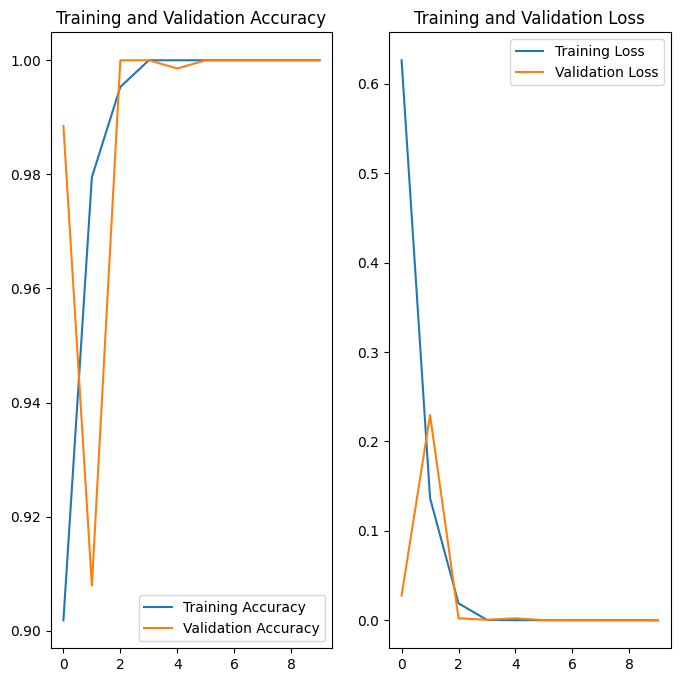

In [106]:
# train the model
epochs = 20 # количество эпох тренировки
history = model.fit(
	train_ds,
	validation_data=val_ds,
	epochs=epochs)

# visualize training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

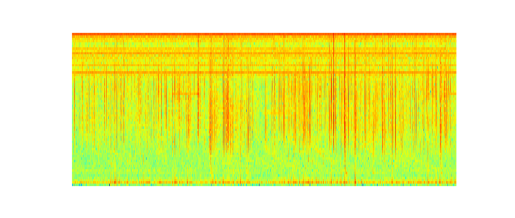

In [110]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Путь к вашему изображению в Google Drive
# image_path = "prediction_data/pred11.png"
# image_path = "validation_data/whistler/PA070721040000_003.mat_7.png"
# image_path = "new_whistler_dataset/whistler/PA070721095500_003.mat_2.png"
image_path = "data_for_predict/undefined/PA070721054000_002.mat_3.png"
# Загрузка изображения
img = load_img(image_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')  # Отключение осей координат
plt.show()

1/1 [==============================] - 0s 39ms/step
На изображении скорее всего whistler (100.00% вероятность)


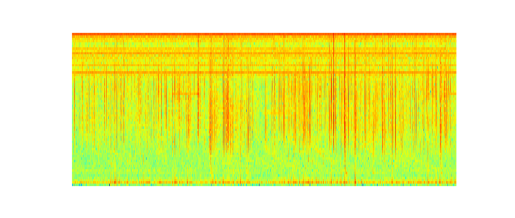

In [111]:
import numpy as np

# Преобразование изображения в массив и добавление дополнительного измерения
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Прогнозирование класса изображения
predictions = model.predict(img_array)

# Получение метрики вероятности для каждого класса
score = tf.nn.softmax(predictions[0])

# Получение наиболее вероятного класса и вероятности этого класса
predicted_class = class_names[np.argmax(score)]
probability = 100 * np.max(score)

# Вывод результата прогноза
print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
    predicted_class,
    probability
))

img = load_img(image_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')  # Отключение осей координат
plt.show()

In [66]:
# Сохранение модели
model_file_name = "wistler_classify_mini.h5"
model.save(model_file_name)

# Скачивание модели с помощью Jupyter Notebook
from IPython.display import FileLink
FileLink(model_file_name)

c:\code\vlf\wistler_classify_mini.h5